<a href="https://colab.research.google.com/github/MrJenish/IT496_T17_CP3/blob/main/CP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
import joblib

Load the Dataset

In [2]:
allODI = pd.read_csv('/content/drive/MyDrive/CP3/all ODI/originalDataset.csv')

# **Exploratory Data Analysis**

In [3]:
allODI.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [4]:
allODI['Ground'].unique()

array(['Melbourne', 'Manchester', "Lord's", 'Birmingham', 'Christchurch',
       'Swansea', 'Leeds', 'The Oval', 'Dunedin', 'Nottingham',
       'Wellington', 'Adelaide', 'Auckland', 'Scarborough', 'Sialkot',
       'Albion', 'Sahiwal', 'Lahore', "St John's", 'Castries', 'Quetta',
       'Sydney', 'Brisbane', 'Karachi', 'Perth', 'Kingstown', 'Hamilton',
       'Ahmedabad', 'Jalandhar', 'Cuttack', 'Colombo (SSC)', 'Amritsar',
       'Delhi', 'Hyderabad (Sind)', 'Bengaluru', 'Gujranwala', 'Multan',
       'Port of Spain', 'Napier', "St George's", 'Colombo (PSS)',
       'Taunton', 'Leicester', 'Bristol', 'Worcester', 'Southampton',
       'Derby', 'Tunbridge Wells', 'Chelmsford', 'Hyderabad (Deccan)',
       'Jaipur', 'Srinagar', 'Vadodara', 'Indore', 'Jamshedpur',
       'Guwahati', 'Moratuwa', 'Sharjah', 'Kingston', 'New Delhi',
       'Thiruvananthapuram', 'Peshawar', 'Faisalabad', 'Pune', 'Hobart',
       'Nagpur', 'Chandigarh', 'Bridgetown', 'Rawalpindi', 'Launceston',
       'Kandy

In [5]:
allODI.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,3977,3977,3977,3977,3753,3977,3977
unique,3977,28,25,28,227,174,3387
top,ODI # 1,Australia,Sri Lanka,Australia,6 wickets,Sharjah,2023
freq,1,588,517,561,347,228,45


In [6]:
allODI.shape

(3977, 7)

In [7]:
allODI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3977 non-null   object
 1   Team 1      3977 non-null   object
 2   Team 2      3977 non-null   object
 3   Winner      3977 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3977 non-null   object
 6   Match Date  3977 non-null   object
dtypes: object(7)
memory usage: 217.6+ KB


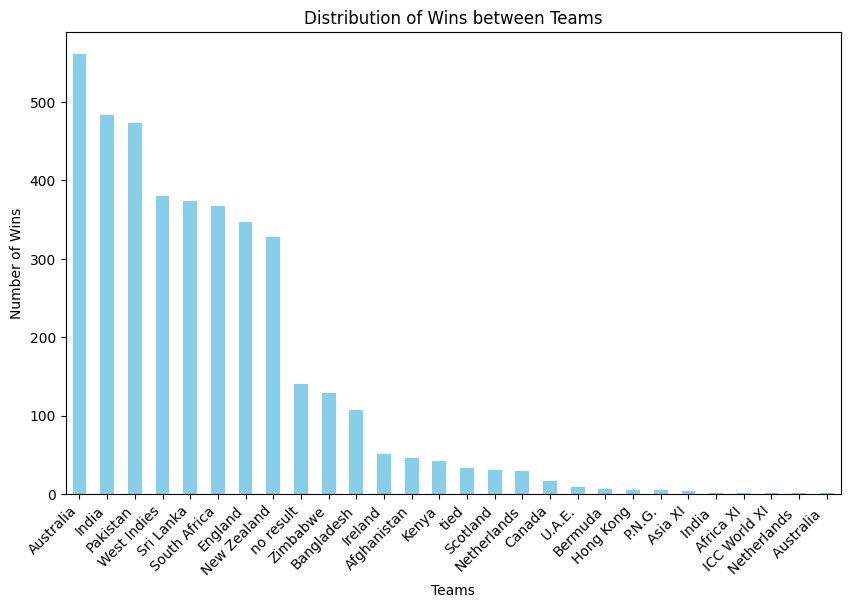

In [8]:
# Example: Distribution of Wins between Teams
win_counts = allODI['Winner'].value_counts()
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Wins between Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.show()

This Graph contain the information about the number of times each team win the match

In [9]:
match_per_year = {}
for i in allODI['Match Date']:
  year = i[-4:]
  if year not in match_per_year:
    match_per_year[i[-4:]] = 0
  match_per_year[i[-4:]] = match_per_year[i[-4:]] + 1

In [10]:
print(match_per_year)

{'1971': 1, '1972': 3, '1973': 5, '1974': 6, '1975': 19, '1976': 6, '1977': 6, '1978': 10, '1979': 26, '1980': 21, '1981': 28, '1982': 33, '1983': 66, '1984': 51, '1985': 65, '1986': 62, '1987': 74, '1988': 61, '1989': 55, '1990': 61, '1991': 39, '1992': 89, '1993': 82, '1994': 98, '1995': 60, '1996': 127, '1997': 115, '1998': 108, '1999': 154, '2000': 131, '2001': 120, '2002': 145, '2003': 147, '2004': 128, '2005': 107, '2006': 160, '2007': 191, '2008': 126, '2009': 150, '2010': 142, '2011': 146, '2012': 90, '2013': 136, '2014': 121, '2015': 146, '2016': 99, '2017': 116, '2023': 45}


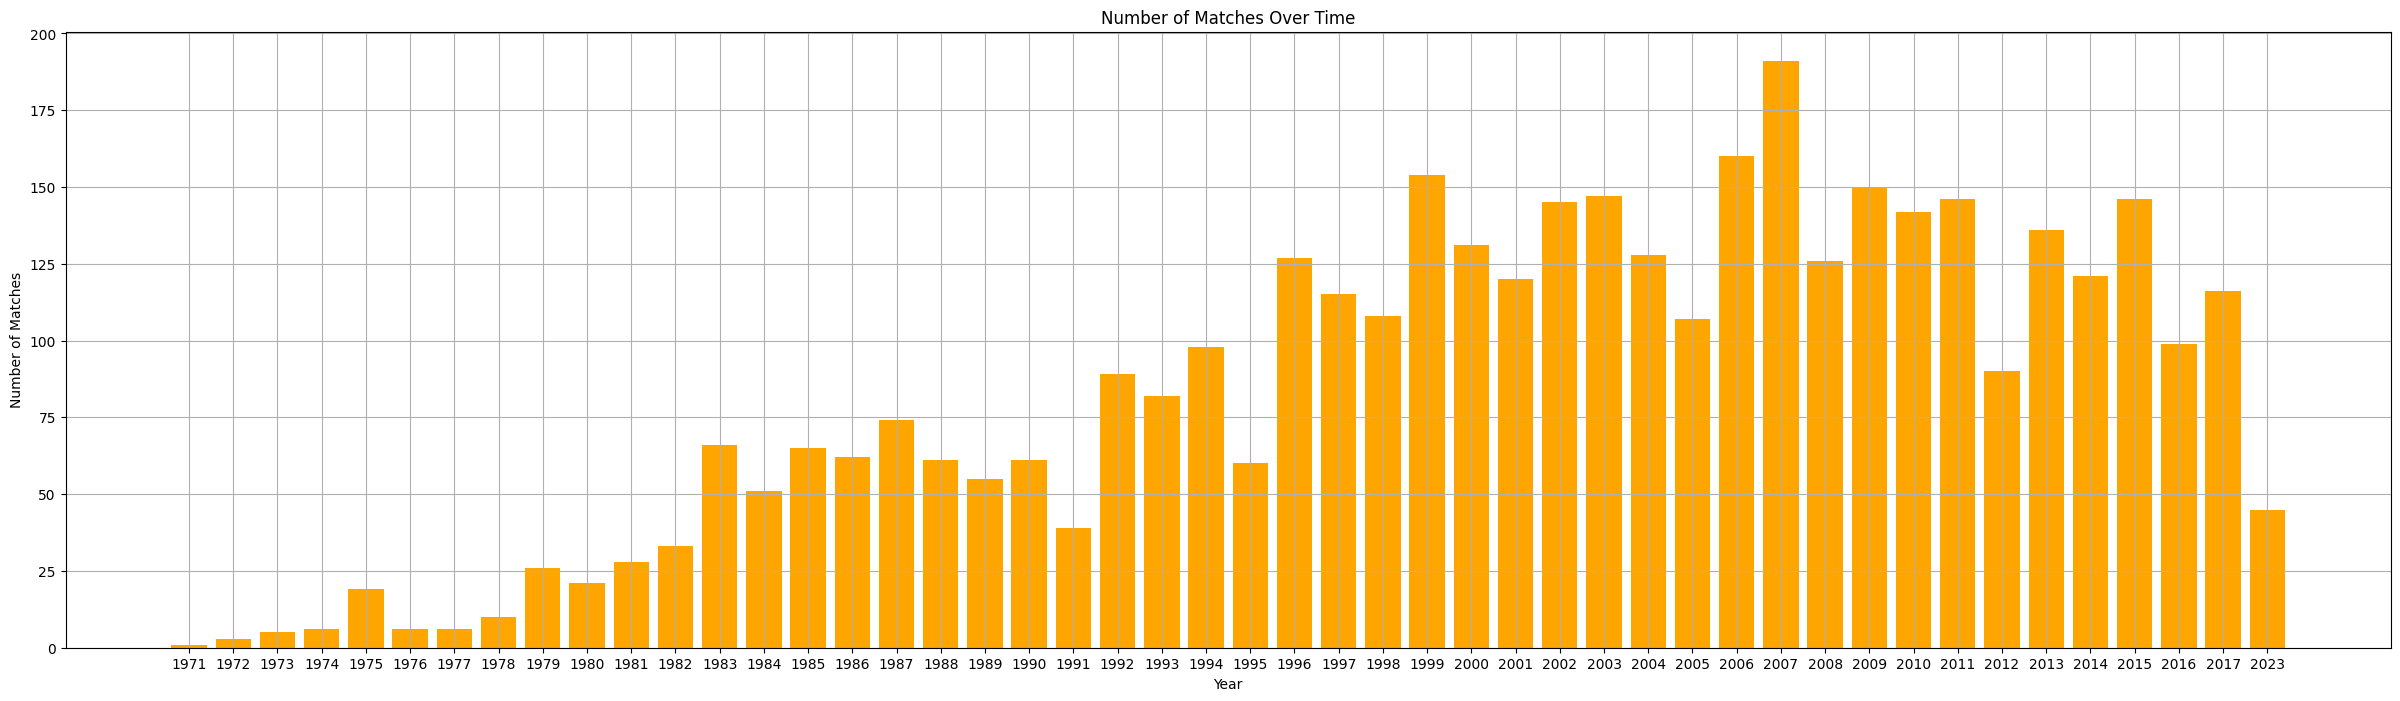

In [11]:
# Example: Match Outcome Over Time
plt.figure(figsize=(30, 8))
years = list(match_per_year.keys())
values = list(match_per_year.values())
plt.bar(range(len(match_per_year)), values, tick_label=years, linestyle='-', color='orange')
plt.title('Number of Matches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

This Graph contain the information about the number of match played each year.

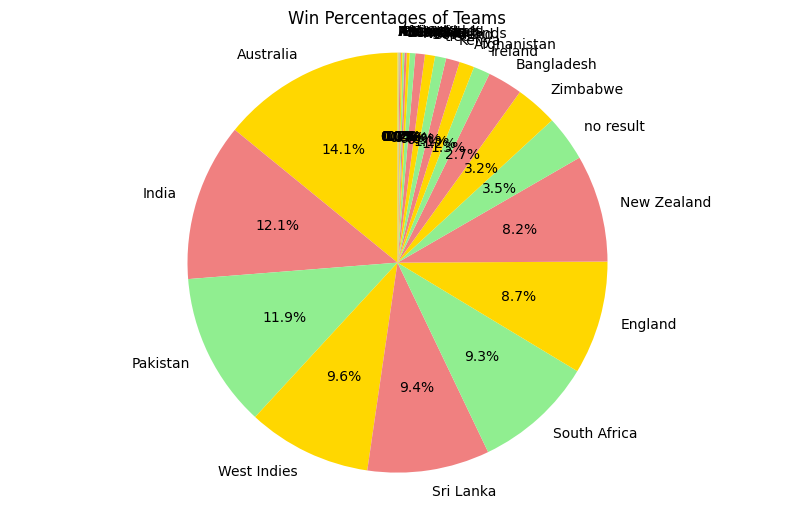

In [12]:
# Example: Pie Chart of Win Percentages
win_percentage = win_counts / len(allODI) * 100
colors = ['gold', 'lightcoral', 'lightgreen']

plt.figure(figsize=(10, 6))
plt.pie(win_percentage, labels=win_percentage.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Win Percentages of Teams')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

This Graph contain the information about the percenatage win of each team.

# **Data Preprocessing**

Now we consider only 10 teams which are played in world cup 2023.

In [13]:
desired_countries = ['England', 'Sri Lanka', 'Pakistan', 'India', 'Bangladesh', 'South Africa', 'New Zealand', 'Australia', 'Afghanistan', 'Netherlands']

In [14]:
condition = allODI['Team 1'].isin(desired_countries) & allODI['Team 2'].isin(desired_countries)
odi_data = allODI[condition]

In [15]:
odi_data.shape

(2376, 7)

In [16]:
features = ['Team 1', 'Team 2', 'Ground']
target = 'Winner'

we use label encoder to encode the data from sting to integer and store it in the file which is useful for future predictions.

In [21]:
data = odi_data[features + [target]].copy()
label_encoder_teams = LabelEncoder()
label_encoder_ground = LabelEncoder()
data['Team 1'] = label_encoder_teams.fit_transform(data['Team 1'])
data['Team 2'] = label_encoder_teams.fit_transform(data['Team 2'])
data['Winner'] = label_encoder_teams.fit_transform(data['Winner'])
data['Ground'] = label_encoder_ground.fit_transform(data['Ground'])
joblib.dump(label_encoder_teams.classes_, 'label_encoder_teams_classes.pkl')
joblib.dump(label_encoder_ground.classes_, 'label_encoder_ground_classes.pkl')

['label_encoder_ground_classes.pkl']

You can see the original label and encoded label in the txt file.

In [22]:
with open('encoded_teams_labels.txt', 'w') as file:
    for original, encoded in zip(label_encoder_teams.classes_, range(len(label_encoder_teams.classes_))):
        file.write(f"{original}: {encoded}\n")

with open('encoded_ground_labels.txt', 'w') as file:
    for original, encoded in zip(label_encoder_ground.classes_, range(len(label_encoder_ground.classes_))):
        file.write(f"{original}: {encoded}\n")

In [23]:
data

,Team 1,Team 2,Ground,Winner
0,1,3,83,1
1,3,1,81,3
2,3,1,78,1
3,3,1,11,3
4,6,7,29,6
...,...,...,...,...
3971,3,5,109,3
3972,6,9,9,6
3973,8,0,2,8
3975,3,7,73,3


# **Model Tranning & Testing**

Split the dataset in train and test.

In [24]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Use stadard scaler for scaling the data.

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

One of the basic ANN model. <br>
In the output layer we use softmax for the predict the winner team.

In [26]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder_teams.classes_), activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 1s 7ms/step - loss: 2.3746 - accuracy: 0.1592 - val_loss: 2.1943 - val_accuracy: 0.3184
Epoch 2/10
48/48 [==============================] - 0s 3ms/step - loss: 2.0413 - accuracy: 0.3158 - val_loss: 1.9265 - val_accuracy: 0.3447
Epoch 3/10
48/48 [==============================] - 0s 3ms/step - loss: 1.8494 - accuracy: 0.3289 - val_loss: 1.8551 - val_accuracy: 0.3053
Epoch 4/10
48/48 [==============================] - 0s 3ms/step - loss: 1.7833 - accuracy: 0.3467 - val_loss: 1.8142 - val_accuracy: 0.3289
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 1.7422 - accuracy: 0.3559 - val_loss: 1.7822 - val_accuracy: 0.3237
Epoch 6/10
48/48 [==============================] - 0s 3ms/step - loss: 1.7081 - accuracy: 0.3836 - val_loss: 1.7544 - val_accuracy: 0.3737
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 1.6778 - accuracy: 0.3987 - val_loss: 1.7331 - val_accuracy: 0.3816
Epoch 8/10
48/48 [==

Analyze the accuracy of the model.

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = [label_encoder_teams.classes_[pred.argmax()] for pred in predictions]


15/15 [==============================] - 0s 2ms/step - loss: 1.7033 - accuracy: 0.4181
Test Accuracy: 41.81%
15/15 [==============================] - 0s 2ms/step


In [28]:
predicted_labels

['South Africa',
 'Australia',
 'India',
 'Sri Lanka',
 'Australia',
 'India',
 'New Zealand',
 'Australia',
 'South Africa',
 'Australia',
 'Australia',
 'Sri Lanka',
 'South Africa',
 'Pakistan',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'India',
 'Sri Lanka',
 'Sri Lanka',
 'Sri Lanka',
 'Australia',
 'Pakistan',
 'India',
 'Australia',
 'India',
 'India',
 'Australia',
 'Australia',
 'England',
 'New Zealand',
 'Australia',
 'New Zealand',
 'Sri Lanka',
 'India',
 'Sri Lanka',
 'Australia',
 'India',
 'Australia',
 'Sri Lanka',
 'India',
 'Sri Lanka',
 'Australia',
 'Sri Lanka',
 'Australia',
 'Australia',
 'South Africa',
 'South Africa',
 'Sri Lanka',
 'New Zealand',
 'New Zealand',
 'Australia',
 'Australia',
 'Sri Lanka',
 'New Zealand',
 'India',
 'Australia',
 'Australia',
 'Sri Lanka',
 'Australia',
 'Australia',
 'India',
 'South Africa',
 'England',
 'Sri Lanka',
 'India',
 'Sri Lanka',
 'Australia',
 'Australia',
 'Pakistan',
 'Sri Lanka',
 'Sri Lanka',
 'A

Print the confusion matrix.

In [29]:
# Evaluate other metrics (confusion matrix, classification report)

conf_matrix = confusion_matrix(label_encoder_teams.inverse_transform(y_test), predicted_labels)
class_report = classification_report(label_encoder_teams.inverse_transform(y_test), predicted_labels)

print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}')

Confusion Matrix:
[[72  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  1  0  0]
 [10  0 10  6  0  6  1  1 10  0  0]
 [26  0  6 29  0  1  2  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0]
 [16  0  5  6  0 12  9  3  9  0  0]
 [14  0  5  8  0  1 18 13 14  0  0]
 [13  0  0 10  0  1  5 18 10  0  0]
 [ 7  0  0  3  0  0  3  8 40  0  0]
 [ 6  0  0  2  0  0  1  1 11  0  0]
 [ 3  0  0  1  0  1  1  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

   Australia       0.42      1.00      0.59        72
  Bangladesh       0.00      0.00      0.00         7
     England       0.38      0.23      0.29        44
       India       0.45      0.39      0.42        74
 Netherlands       0.00      0.00      0.00         1
 New Zealand       0.55      0.20      0.29        60
    Pakistan       0.45      0.25      0.32        73
South Africa       0.41      0.32      0.36        57
   Sri Lanka       0.38      0.66      0.48        61
   no result       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Hyper Parameter Tunning**

In [30]:
# Function to create the model for KerasClassifier
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=len(features), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder_teams.classes_), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [31]:
# Create KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=0)

<ipython-input-31-89758c25e166>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=0)


We use Adam, Stochastic gradient descent and rmsprop and check the accuracy of the model.

In [32]:
# Define hyperparameters for tuning
param_grid = {'optimizer': ['adam', 'sgd', 'rmsprop']}

In [33]:
# Grid search
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

We can see that Adam optimizer give us 35.32% accuracy.

In [34]:
# Print results
print(f'Best Accuracy: {grid_result.best_score_ * 100:.2f}% using {grid_result.best_params_}')

Best Accuracy: 35.32% using {'optimizer': 'adam'}


In [35]:
# Function to create the model for KerasClassifier
def create_model(optimizer='adam', num_layers=1, num_neurons=64, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=len(features), activation='relu'))

    # Add dropout layers if specified
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(len(label_encoder_teams.classes_), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [36]:
# Create KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=0)


<ipython-input-36-89758c25e166>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=0)


Now we use more hyper parameter and it's different value and check the accuracy of the model and also save the best model for future reference.

In [37]:
# Define hyperparameters for tuning
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'num_layers': [1, 2, 3],
    'num_neurons': [32, 64, 128],
    'dropout_rate': [0.0, 0.2, 0.5]
}

In [38]:
# Grid search
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


We can see that among the different value of the hyperparameter we get 43.63% accuracy.

In [39]:
# Print results
print(f'Best Accuracy: {grid_result.best_score_ * 100:.2f}% using {grid_result.best_params_}')

Best Accuracy: 43.63% using {'dropout_rate': 0.0, 'num_layers': 3, 'num_neurons': 128, 'optimizer': 'adam'}


In [40]:
# Save the best model
best_model = grid_result.best_estimator_.model
best_model.save('best_model.h5')

In [41]:
# Make predictions on the test set using the best model
predictions = best_model.predict(X_test)
predicted_labels = [label_encoder_teams.classes_[pred.argmax()] for pred in predictions]


15/15 [==============================] - 0s 2ms/step


In [42]:
# Evaluate other metrics (confusion matrix, classification report)
conf_matrix = confusion_matrix(label_encoder_teams.inverse_transform(y_test), predicted_labels)
class_report = classification_report(label_encoder_teams.inverse_transform(y_test), predicted_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}')

Confusion Matrix:
[[63  0  1  0  0  0  0  0  8  0  0]
 [ 6  0  0  0  0  0  0  0  1  0  0]
 [ 8  0  7  4  0  7  5  0 13  0  0]
 [18  0  7 38  0  2  1  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0]
 [13  0  5  4  0 16 13  0  9  0  0]
 [ 9  0  0 10  0  0 35  0 19  0  0]
 [11  0  0  8  0  1  9  2 26  0  0]
 [ 2  0  0  5  0  0  6  0 48  0  0]
 [ 6  0  0  1  0  0  2  0 12  0  0]
 [ 3  0  0  1  0  1  1  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

   Australia       0.45      0.88      0.60        72
  Bangladesh       0.00      0.00      0.00         7
     England       0.35      0.16      0.22        44
       India       0.54      0.51      0.52        74
 Netherlands       0.00      0.00      0.00         1
 New Zealand       0.59      0.27      0.37        60
    Pakistan       0.49      0.48      0.48        73
South Africa       1.00      0.04      0.07        57
   Sri Lanka       0.33      0.79      0.47        61
   no result       0

# **Prediction of World cup 2023 Winner Team**

Load the Model

In [44]:
# Load the trained model
model = load_model('best_model.h5')  # Change the filename if needed

In [45]:
# Load the new data from the CSV file
file_path = '/content/drive/MyDrive/CP3/2023.csv'  # Provide the actual path to your CSV file
new_data = pd.read_csv(file_path)

In [46]:
new_data

,Date,Team A,Team B,Venue,Time IST
0,"Thursday, 05 October",England,New Zealand,Ahmedabad,2:00 P.M
1,"Friday, 06 October",Pakistan,Netherlands,Hyderabad,2:00 P.M
2,"Saturday, 07 October",Bangladesh,Afghanistan,Dharamsala,10:30 A.M
3,"Saturday, 07 October",South Africa,Sri Lanka,Delhi,2:00 P.M
4,"Sunday, 08 October",India,Australia,Chennai,2:00 P.M
5,"Monday, 09 October",New Zealand,Netherlands,Hyderabad,2:00 P.M
6,"Tuesday, 10 October",England,Bangladesh,Dharamsala,10:30 A.M
7,"Tuesday, 10 October",Pakistan,Sri Lanka,Hyderabad,2:00 P.M
8,"Wednesday, 11 October",India,Afghanistan,Delhi,2:00 P.M
9,"Thursday, 12 October",Australia,South Africa,Lucknow,2:00 P.M


Rename the column name

In [47]:
new_data = new_data.rename(columns={'Team A': 'Team 1', 'Team B': 'Team 2', 'Venue': 'Ground'})

In [48]:
new_data

,Date,Team 1,Team 2,Ground,Time IST
0,"Thursday, 05 October",England,New Zealand,Ahmedabad,2:00 P.M
1,"Friday, 06 October",Pakistan,Netherlands,Hyderabad,2:00 P.M
2,"Saturday, 07 October",Bangladesh,Afghanistan,Dharamsala,10:30 A.M
3,"Saturday, 07 October",South Africa,Sri Lanka,Delhi,2:00 P.M
4,"Sunday, 08 October",India,Australia,Chennai,2:00 P.M
5,"Monday, 09 October",New Zealand,Netherlands,Hyderabad,2:00 P.M
6,"Tuesday, 10 October",England,Bangladesh,Dharamsala,10:30 A.M
7,"Tuesday, 10 October",Pakistan,Sri Lanka,Hyderabad,2:00 P.M
8,"Wednesday, 11 October",India,Afghanistan,Delhi,2:00 P.M
9,"Thursday, 12 October",Australia,South Africa,Lucknow,2:00 P.M


Trim the column data

In [49]:
new_data['Team 1'] = new_data['Team 1'].str.strip()
new_data['Team 2'] = new_data['Team 2'].str.strip()
new_data['Ground'] = new_data['Ground'].str.strip()

We use the same label encoder that we use in the tranning the model.

In [50]:
# Encode categorical features using the same LabelEncoder
label_encoder_teams_2023 = LabelEncoder()
label_encoder_teams_2023.classes_ = joblib.load('label_encoder_teams_classes.pkl')

label_encoder_ground_2023 = LabelEncoder()
label_encoder_ground_2023.classes_ = joblib.load('label_encoder_ground_classes.pkl')


In [51]:
# Encode categorical features using the same LabelEncoder
new_data['Team 1'] = label_encoder_teams_2023.transform(new_data['Team 1'])
new_data['Team 2'] = label_encoder_teams_2023.transform(new_data['Team 2'])
new_data['Ground'] = label_encoder_ground_2023.transform(new_data['Ground'])

Predict the winner of each match.

In [52]:
# Make predictions using the loaded model
predictions = model.predict(new_data[['Team 1', 'Team 2', 'Ground']])
predicted_labels = [label_encoder_teams_2023.classes_[pred.argmax()] for pred in predictions]


2/2 [==============================] - 0s 5ms/step


Assign the points to the team based on the predictions

In [82]:
# Assign points based on predictions
points_dict = {team: 0 for team in label_encoder_teams_2023.classes_}
for winner in predicted_labels:
    points_dict[winner] += 2

Display the top 4 teams

In [83]:
# Sort teams by points and get the top 4
sorted_teams = sorted(points_dict.items(), key=lambda x: x[1], reverse=True)[:4]
top_4_teams = [team[0] for team in sorted_teams]

print("Points Table:")
print("Team\tPoints")
for team, points in sorted_teams:
    print(f"{team}\t{points}")


Points Table:
Team	Points
Pakistan	72
Sri Lanka	18
Afghanistan	0
Australia	0


In [84]:
print("\nTop 4 Teams:")
print(top_4_teams)


Top 4 Teams:
['Pakistan', 'Sri Lanka', 'Afghanistan', 'Australia']


Predict the Winner of first semi finale

In [76]:
Semi_finalist_1 = ['India', 'New Zealand', 'Mumbai']
input_features_1 = np.array([[4, 6, 89]])

In [77]:
predictions_1 = model.predict(input_features_1)

1/1 [==============================] - 0s 43ms/step


In [78]:
if predictions_1[0][4] < predictions_1[0][6]:
  print('India was winner')
else :
  print('New Zealand was winner')

India was winner


Predict the winner of second semi finale

In [72]:
Semi_finalist_2 = ['South Africa', 'Australia', 'Kolkata']
input_features_2 = np.array([[8, 1, 73]])
predictions_2 = model.predict(input_features_2)
print(predictions_2[0][8], predictions_2[0][1])
if predictions_1[0][8] > predictions_1[0][1]:
  print('South Africa was winner')
else :
  print('Australia was winner')

1/1 [==============================] - 0s 47ms/step
2.7105276e-29 0.0
South Africa was winner


Predict the Winner of World cup 2023

In [80]:
finalist = ['India', 'South Africa', 'Ahemadabad']
input_features = np.array([[4, 8, 2]])
final_predictions = model.predict(input_features)
print(final_predictions[0][4], final_predictions[0][8])

1/1 [==============================] - 0s 63ms/step
3.5766383e-09 2.7745342e-05


In [81]:
if predictions_1[0][4] > predictions_1[0][8]:
  print('India was winner')
else :
  print('South Africa was winner')

India was winner
